## Group members:
### Noa Bar Nov
### Shir Gonen
### Koral Yehezkia
### Eden Cohen


# EDA Project - Laptop sales

<div>
<img src="images/dataset-cover.png" width="400"/>
</div>


1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Outliers](#section1.3)    
   1.4 [Transformations](section1.4)
  
2. [Understand the data](#section2)
3. [Correlations and Conclusions](#section3)

<div>
<img src="images/red.png" width="100"/>
</div>

לסדר שההיפר קישורים יעבדו


We'll work with a marketing of Laptops dataset, taken from [Flipkaet](flipkart.com)

Based on the example [here](https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list)

### Explaination about the data:

| Column      | Description |
|:----------- |:----------- |
| EDUC      | Years of Education       |
| SES       | Socioeconomic Status       |
| MMSE      | Mini Mental State Examination    |
| CDR       |  Clinical Dementia Rating      |
| eTIV      | Estimated Total Intracranial Volume     |
| ASF       | Normalize Whole Brain Volume      |

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/NoaBarNov/Data-Science/main/Cleaned_Laptop_data1.csv'
data_comp = pd.read_csv(url)

In [3]:
data = data_comp.copy()

In [4]:
data.shape

(896, 23)

In [5]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


---
### 1. Wrangling data

#### 1.1 Fix columns

In [6]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

All of the columns seems to be OK

#### 1.2 Missing values

In [7]:
data.isnull().sum().sort_values(ascending=False)

brand              0
weight             0
ratings            0
star_rating        0
discount           0
old_price          0
latest_price       0
msoffice           0
Touchscreen        0
warranty           0
display_size       0
graphic_card_gb    0
model              0
os_bit             0
os                 0
hdd                0
ssd                0
ram_type           0
ram_gb             0
processor_gnrtn    0
processor_name     0
processor_brand    0
reviews            0
dtype: int64

Replacing missing to NaN's for conveniency

In [8]:
data = data.replace('Missing' , np.nan)

In [9]:
data.isnull().sum().sort_values(ascending=False)

display_size       332
processor_gnrtn    239
model               95
brand                0
ratings              0
star_rating          0
discount             0
old_price            0
latest_price         0
msoffice             0
Touchscreen          0
warranty             0
graphic_card_gb      0
weight               0
os_bit               0
os                   0
hdd                  0
ssd                  0
ram_type             0
ram_gb               0
processor_name       0
processor_brand      0
reviews              0
dtype: int64

##### Fixing processor generator column

In [10]:
data['processor_gnrtn'].isnull().sum()

239

<AxesSubplot:xlabel='processor_gnrtn', ylabel='Percent'>

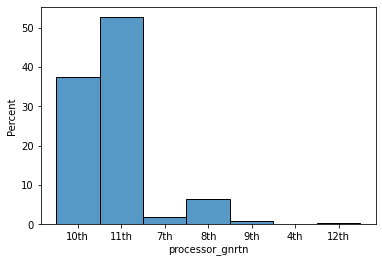

In [11]:
sns.histplot(data = data, x='processor_gnrtn', stat = 'percent')

We have dicided to ignore the missing values because there are 26.26% missing valuse

##### Fixing model column

In [12]:
data['model'].isnull().sum()

95

In [13]:
data.model.unique()

array(['A6-9225', 'Ideapad', 'PURA', 'APU', 'Athlon', 'Aspire',
       'ExpertBook', nan, 'v15', 'VivoBook', 'EeeBook', 'Nitro', 'Cosmos',
       'x360', 'IdeaPad', 'Celeron', '15q', '250-G6', 'Vostro', '15',
       'Pavilion', 'Book', 'Inspiron', 'INBook', 'ThinkPad', 'Chromebook',
       'Commercial', '14s', 'INSPIRON', 'V15', '15s', '3000', 'Notebook',
       'Vivo', 'DA', 'Insprion', 'Travelmate', '14a', 'Predator', 'Spin',
       'Swift', 'ROG', 'XPS', 'Omen', 'Surface', 't.book', 'Yoga', 'Gram',
       'Spectre', 'VivoBook14', 'TUF', 'Book(Slim)', 'Pro', 'PureBook',
       'ASUS', 'Katana', 'GF63', 'Thinkbook', 'Intel', 'G15', 'ZenBook',
       'Legion', 'Modern', 'ThinkBook', 'Prestige', 'Zenbook', 'MacBook',
       'Sword', 'Envy', 'SE', 'ConceptD', 'HP', 'DELL', 'X390', 'Thinpad',
       'Inpiron', 'GAMING', 'GS', '430', 'Liber', 'F17', 'B50-70', 'GE76',
       'GP65', 'GP76', '250', '3511', 'G3', 'GS66', 'X1', 'GF65',
       'Stealth', 'Zephyrus', 'Summit', 'OMEN', 'Pulse', '

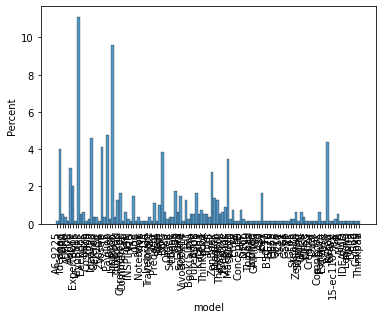

In [14]:
sns.histplot(data = data, x= 'model', stat = 'percent')
plt.xlabel("model")
plt.xticks(rotation=90)
plt.show()

We have dicided to ignore the missing values because there are too many selecting options and we wouldn't like to delete 10% of our data

##### fixing display size coloumn

In [15]:
data['display_size'].isnull().sum()

332

<AxesSubplot:xlabel='display_size', ylabel='Percent'>

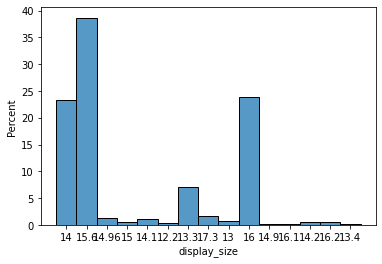

In [16]:
sns.histplot(data = data, x= 'display_size', stat = 'percent')

We have dicided to ignore the missing values because there are 33.33% missing valuse

#### 1.3 Transformations

##### Fixing ram_gb column

In [17]:
data.ram_gb.unique()

array(['4 GB GB', '8 GB GB', '32 GB GB', '16 GB GB'], dtype=object)

In [18]:
data['ram_gb'] =data['ram_gb'].replace({'4 GB GB':4,'8 GB GB':8,'16 GB GB':16,'32 GB GB':32})
data.ram_gb.unique()

array([ 4,  8, 32, 16], dtype=int64)

##### Fixing processor_gnrtn column

In [19]:
data.processor_gnrtn.unique()

array(['10th', nan, '11th', '7th', '8th', '9th', '4th', '12th'],
      dtype=object)

In [20]:
data['processor_gnrtn'] =data['processor_gnrtn'].replace({'10th':10,'11th':11,'7th':7,'8th':8,'8th':8,'9th':9,'12th':12,'4th':4})
data.processor_gnrtn.unique()

array([10., nan, 11.,  7.,  8.,  9.,  4., 12.])

##### Fixing ssd column

In [21]:
data.ssd.unique()

array(['0 GB', '128 GB', '256 GB', '32 GB', '512 GB', '1024 GB',
       '2048 GB', '3072 GB'], dtype=object)

In [22]:
data['ssd'] =data['ssd'].replace({'0 GB':0,'128 GB':128,'256 GB':256,'32 GB':32,'512 GB':512,'1024 GB':1024,'2048 GB':2048,'3072 GB':3072})
data.ssd.unique()

array([   0,  128,  256,   32,  512, 1024, 2048, 3072], dtype=int64)

##### Fixing hdd column

In [23]:
data.hdd.unique()

array(['1024 GB', '512 GB', '0 GB', '2048 GB'], dtype=object)

In [24]:
data['hdd'] =data['hdd'].replace({'0 GB':0,'512 GB':512,'1024 GB':1024,'2048 GB':2048})
data.hdd.unique()

array([1024,  512,    0, 2048], dtype=int64)

##### Fixing os_bit column

In [25]:
data.os_bit.unique()

array(['64-bit', '32-bit'], dtype=object)

In [26]:
data['os_bit'] =data['os_bit'].replace({'64-bit':64,'32-bit':32})
data.os_bit.unique()

array([64, 32], dtype=int64)

##### Fixing display_size column

In [27]:
data.display_size.unique()

array([nan, '14', '15.6', '14.96', '15', '14.1', '12.2', '13.3', '17.3',
       '13', '16', '14.9', '16.1', '14.2', '16.2', '13.4'], dtype=object)

In [28]:
data['display_size'] = data['display_size'].astype(float)

In [29]:
data.display_size.info()

<class 'pandas.core.series.Series'>
RangeIndex: 896 entries, 0 to 895
Series name: display_size
Non-Null Count  Dtype  
--------------  -----  
564 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


##### Fixing Touchscreen column

In [30]:
data['Touchscreen'] = data['Touchscreen'].replace({'Yes':1,'No':0})

In [31]:
data.Touchscreen.unique()

array([0, 1], dtype=int64)

##### Fixing msoffice column

In [32]:
data['msoffice'] = data['msoffice'].replace({'Yes':1,'No':0})

In [33]:
data.msoffice.unique()

array([0, 1], dtype=int64)

##### Fixing weight column

In [34]:
data.weight.unique()

array(['ThinNlight', 'Casual', 'Gaming'], dtype=object)

In [35]:
data['weight'] = data['weight'].replace({'ThinNlight':1,'Casual':2,'Gaming':3})

In [36]:
data.weight.unique()

array([1, 2, 3], dtype=int64)

Lets look at our data after the changes:

In [37]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10.0,4,DDR4,0,1024,Windows,...,NaN,0,0,0,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10.0,4,DDR4,0,512,Windows,...,NaN,0,0,0,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,256,0,Windows,...,NaN,0,0,0,24990,33490,25,3.7,1657,234


#### 1.4 Noisy data - outliers

We choose only the numeric data because we want to see it in boxplot

Select only numeric columns:

In [38]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn    float64
ram_gb               int64
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight               int64
display_size       float64
warranty             int64
Touchscreen          int64
msoffice             int64
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [39]:
numeric_features = ['processor_gnrtn','ram_gb','ssd','hdd','os_bit','weight','display_size','Touchscreen','msoffice','warranty','latest_price','old_price','discount','star_rating','ratings','reviews']

creating melted data frame for boxplots

In [40]:
melted_by_brand = pd.melt(data, id_vars = 'brand', value_vars = numeric_features)
melted_by_brand

,brand,variable,value
0,Lenovo,processor_gnrtn,10.0
1,Lenovo,processor_gnrtn,10.0
2,Avita,processor_gnrtn,10.0
3,Avita,processor_gnrtn,10.0
4,Avita,processor_gnrtn,10.0
...,...,...,...
14331,ASUS,reviews,0.0
14332,ASUS,reviews,0.0
14333,ASUS,reviews,0.0
14334,SAMSUNG,reviews,0.0


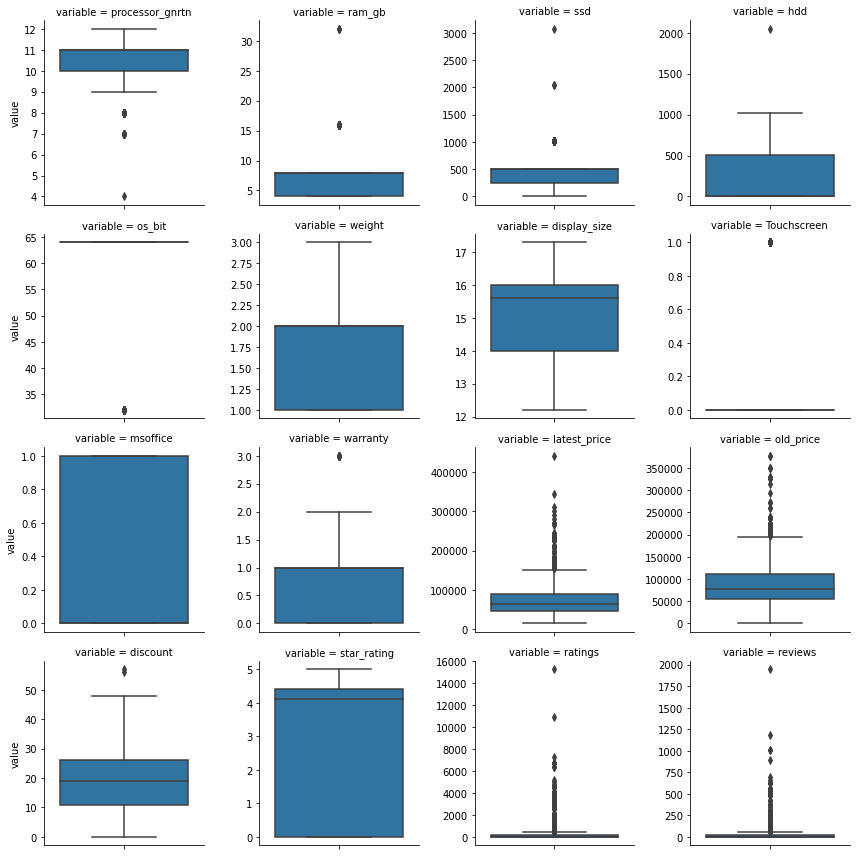

In [41]:
g = sns.FacetGrid(data =melted_by_brand, col='variable',  col_wrap=4,sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

Lets focuse on the ratings, reviews and star ratings columns because a large amount of zeros (as it seems...)

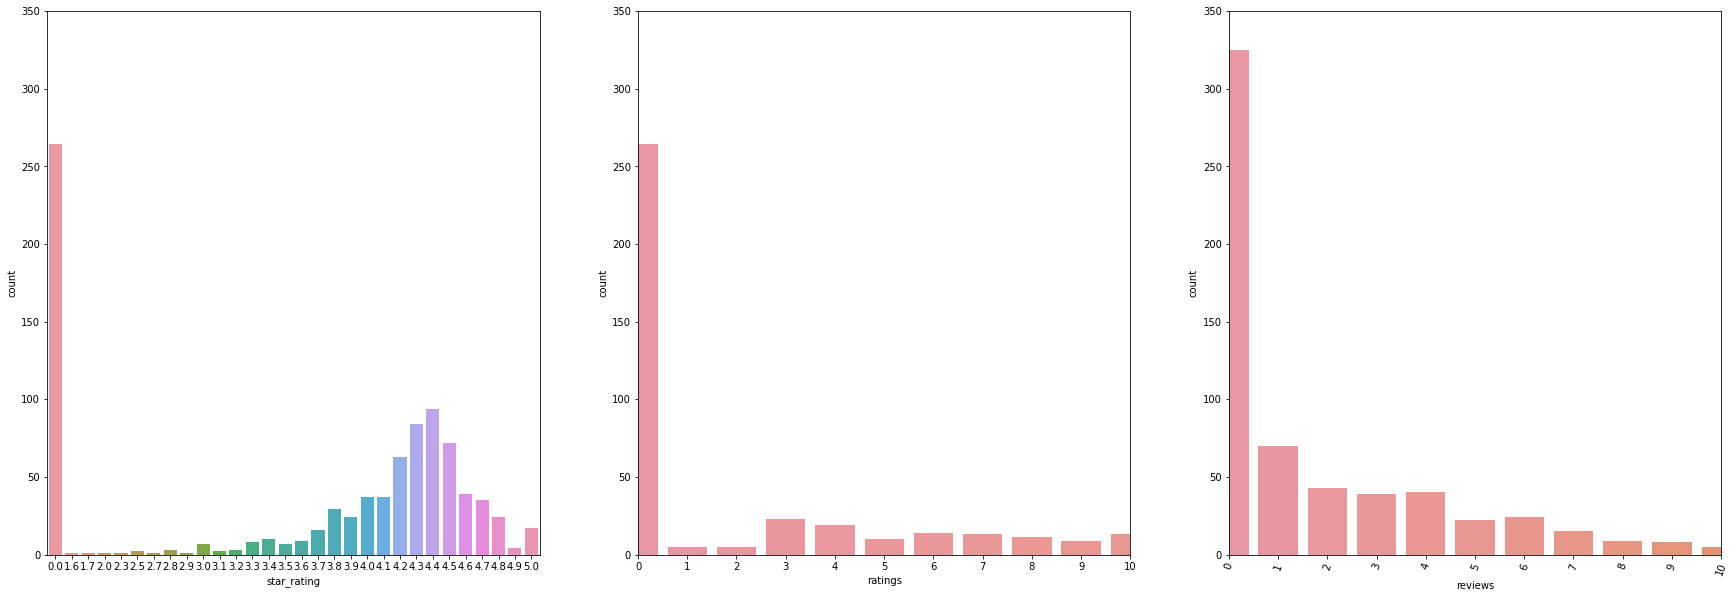

In [69]:
fig, ax = plt.subplots(1,3,figsize=(30, 10))
ax0 = sns.countplot(data = data, x = 'star_rating', ax = ax[0])
ax0.set(ylim=(0,350))
ax1 = sns.countplot(data = data, x = 'ratings', ax = ax[1])
ax1.set(xlim=(0,10))
ax1.set(ylim=(0,350))
ax2 = sns.countplot(data = data, x = 'reviews', ax = ax[2])
ax2.set(xlim=(0,10))
ax2.set(ylim=(0,350))
plt.xticks(rotation = 70)
plt.show()

We will check the number of row that contains zero at columns star rating and ratings (because we see that star ratings has more than 250 rows that includs zero)

In [43]:
data[(data.ratings == 0) & (data.star_rating == 0)]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
8,HP,Athlon,AMD,Athlon Dual,10.0,32,DDR4,32,0,Windows,...,14.0,0,0,0,26899,27668,2,0.0,0,0
13,ASUS,ExpertBook,Intel,Core i5,10.0,8,DDR4,512,0,Windows,...,NaN,0,0,0,69990,0,0,0.0,0,0
14,ASUS,VivoBook,Intel,Celeron Dual,NaN,4,DDR4,0,512,Windows,...,NaN,0,0,0,26990,28990,6,0.0,0,0
15,ASUS,EeeBook,Intel,Celeron Dual,NaN,4,DDR4,0,512,Windows,...,NaN,0,0,0,22990,27990,17,0.0,0,0
17,ASUS,ExpertBook,Intel,Core i5,10.0,8,DDR4,0,1024,Windows,...,14.0,0,0,0,58799,77990,24,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,ASUS,ROG,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,16.0,1,0,0,135990,172990,21,0.0,0,0
891,ASUS,ROG,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,16.0,1,0,0,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,NaN,1,0,0,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,16.0,1,0,0,142990,0,0,0.0,0,0


star ratings and ratings containning 264 shared rows of zero stars due zero ratings, it means that people didn't dive 0 stars to a product, the costumers didnt rate the product at all. We will notice that when we want to to correlation with those columns. 

---
### 2. Understand the data

Lets look at our data visually and see if the data is ready to be correlated (יש מצב שהמצאתי מילה)

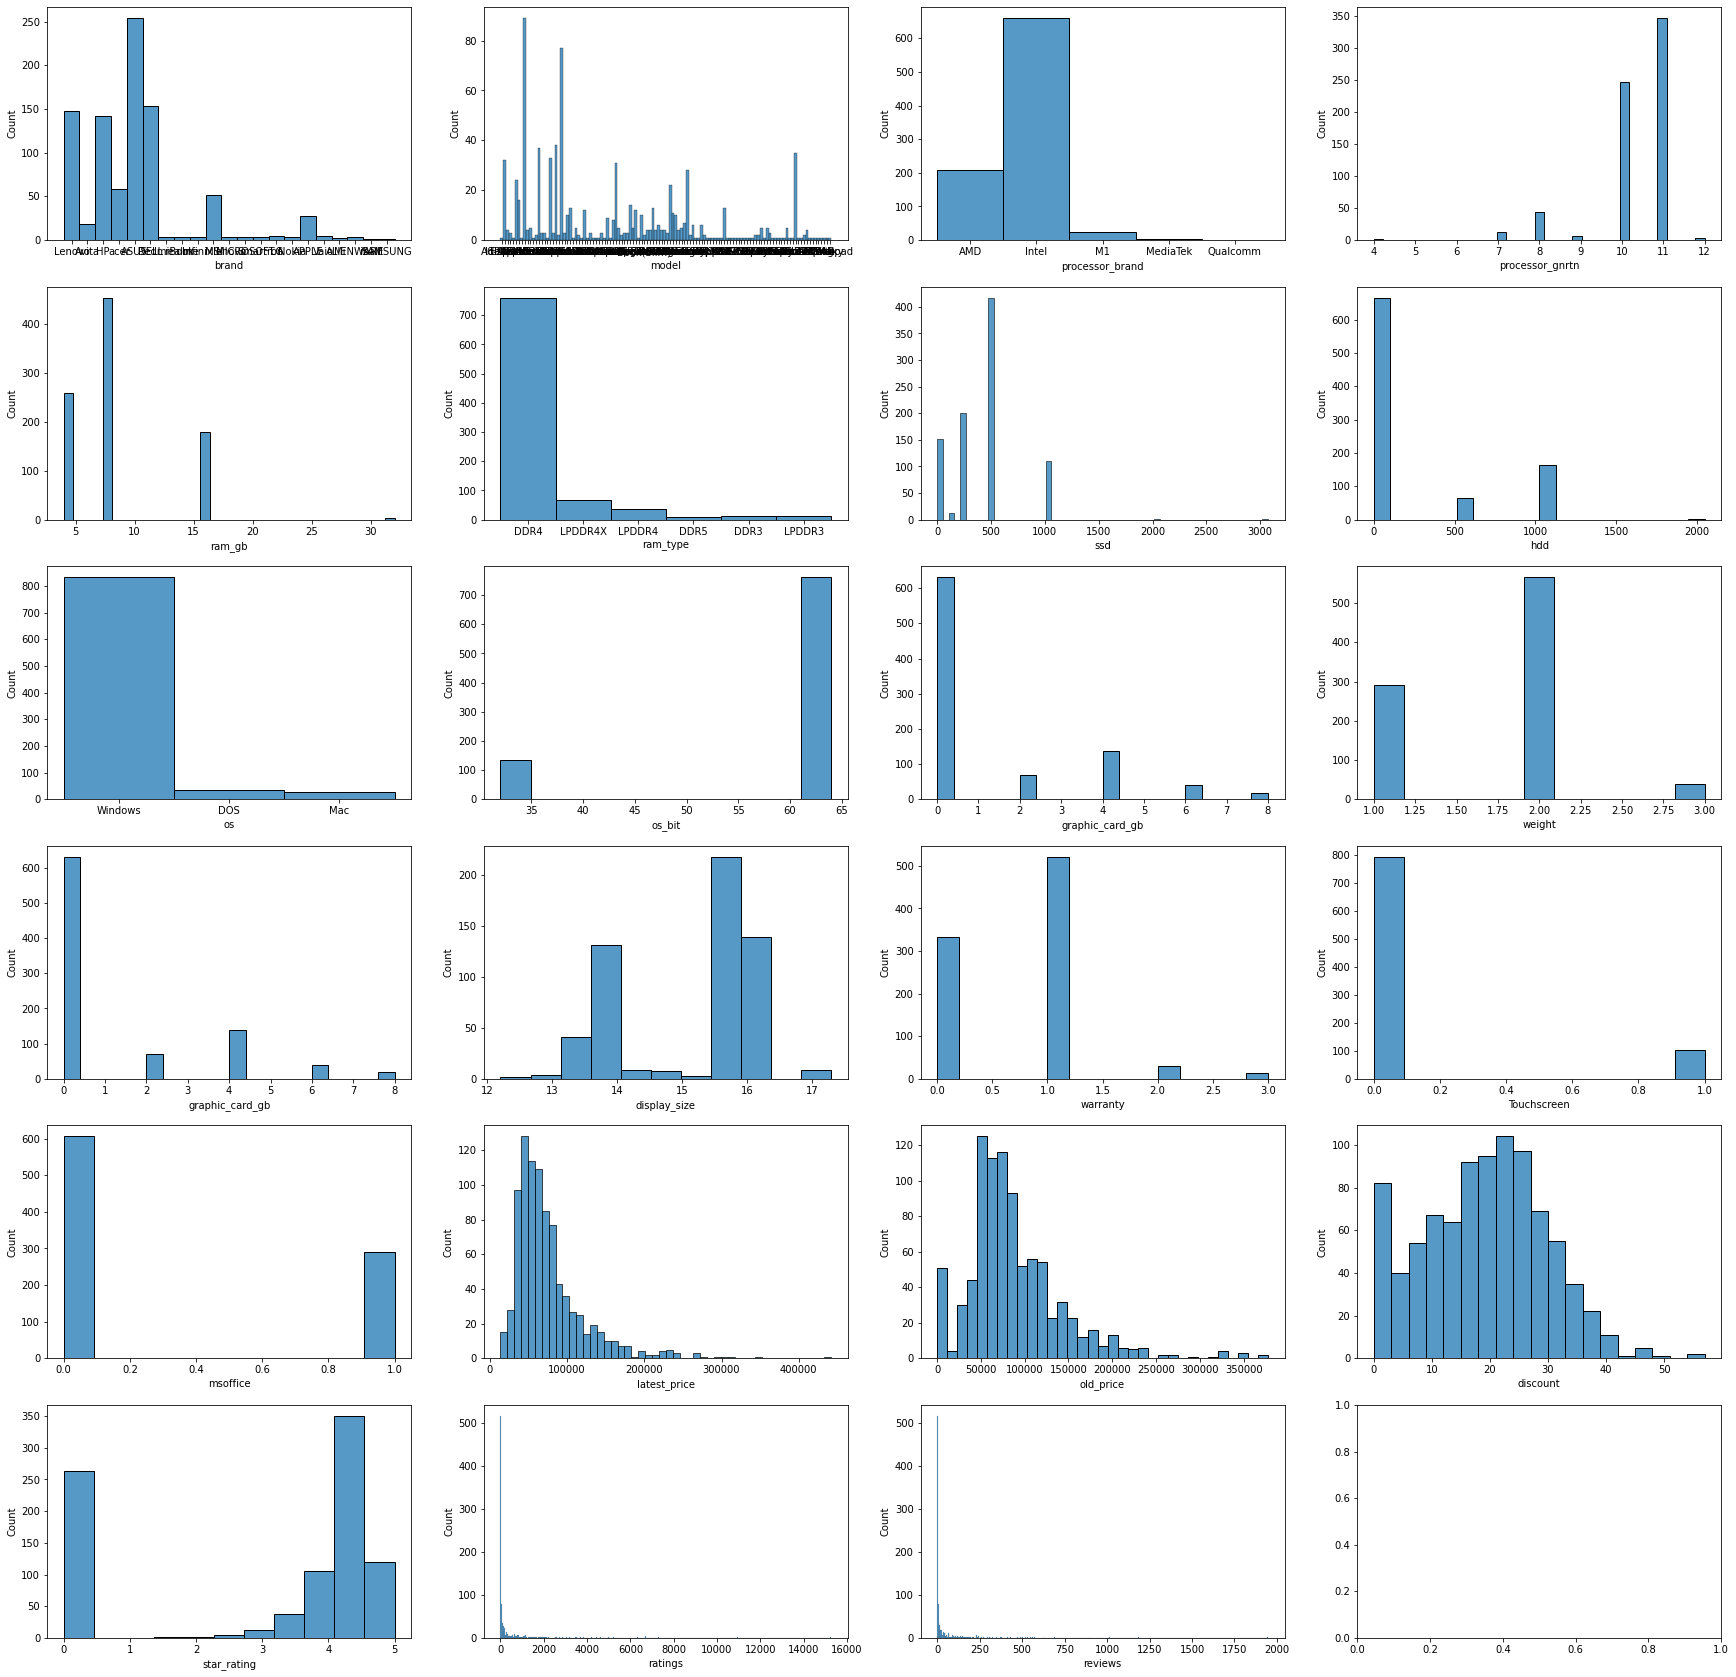

In [142]:
fig, axes = plt.subplots(6,4, figsize=(30,30))
sns.histplot(data = data, x = 'brand', ax = axes[0,0], palette='gist_ncar_r')
sns.histplot(data = data, x = 'model', ax = axes[0,1], palette='gist_ncar_r')
sns.histplot(data = data, x = 'processor_brand', ax = axes[0,2], palette='gist_ncar_r')
sns.histplot(data = data, x = 'processor_gnrtn', ax = axes[0,3], palette='gist_ncar_r')
sns.histplot(data = data, x = 'ram_gb', ax = axes[1,0], palette='gist_ncar_r')
sns.histplot(data = data, x = 'ram_type', ax = axes[1,1], palette='gist_ncar_r')
sns.histplot(data = data, x = 'ssd', ax = axes[1,2], palette='gist_ncar_r')
sns.histplot(data = data, x = 'hdd', ax = axes[1,3], palette='gist_ncar_r')
sns.histplot(data = data, x = 'os', ax = axes[2,0], palette='gist_ncar_r')
sns.histplot(data = data, x = 'os_bit', ax = axes[2,1], palette='gist_ncar_r')
sns.histplot(data = data, x = 'graphic_card_gb', ax = axes[2,2], palette='gist_ncar_r')
sns.histplot(data = data, x = 'weight', ax = axes[2,3], palette='gist_ncar_r')
sns.histplot(data = data, x = 'graphic_card_gb', ax = axes[3,0], palette='gist_ncar_r')
sns.histplot(data = data, x = 'display_size', ax = axes[3,1], palette='gist_ncar_r')
sns.histplot(data = data, x = 'warranty', ax = axes[3,2], palette='gist_ncar_r')
sns.histplot(data = data, x = 'Touchscreen', ax = axes[3,3], palette='gist_ncar_r')
sns.histplot(data = data, x = 'msoffice', ax = axes[4,0], palette='gist_ncar_r')
sns.histplot(data = data, x = 'latest_price', ax = axes[4,1], palette='gist_ncar_r')
sns.histplot(data = data, x = 'old_price', ax = axes[4,2], palette='gist_ncar_r')
sns.histplot(data = data, x = 'discount', ax = axes[4,3], palette='gist_ncar_r')
sns.histplot(data = data, x = 'star_rating', ax = axes[5,0], palette='gist_ncar_r')
sns.histplot(data = data, x = 'ratings', ax = axes[5,1], palette='gist_ncar_r')
sns.histplot(data = data, x = 'reviews', ax = axes[5,2], palette='gist_ncar_r')
plt.show()



ולראות איך מורידים את הגרף האחרון!!!
<div>
<img src="images/red.png" width="100"/>
</div>

---
### 3. Correlations and Conclusions

Let's divide the information into numerical and categorical variables.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            801 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  657 non-null    float64
 5   ram_gb           896 non-null    int64  
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    int64  
 8   hdd              896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    int64  
 13  display_size     564 non-null    float64
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    int64  
 16  msoffice         896 non-null    int64  
 17  latest_price    

In [46]:
categorial_features = ['brand', 'model', 'processor_brand','processor_name','ram_type','os']

In [47]:
numeric_features 

['processor_gnrtn',
 'ram_gb',
 'ssd',
 'hdd',
 'os_bit',
 'weight',
 'display_size',
 'Touchscreen',
 'msoffice',
 'warranty',
 'latest_price',
 'old_price',
 'discount',
 'star_rating',
 'ratings',
 'reviews']

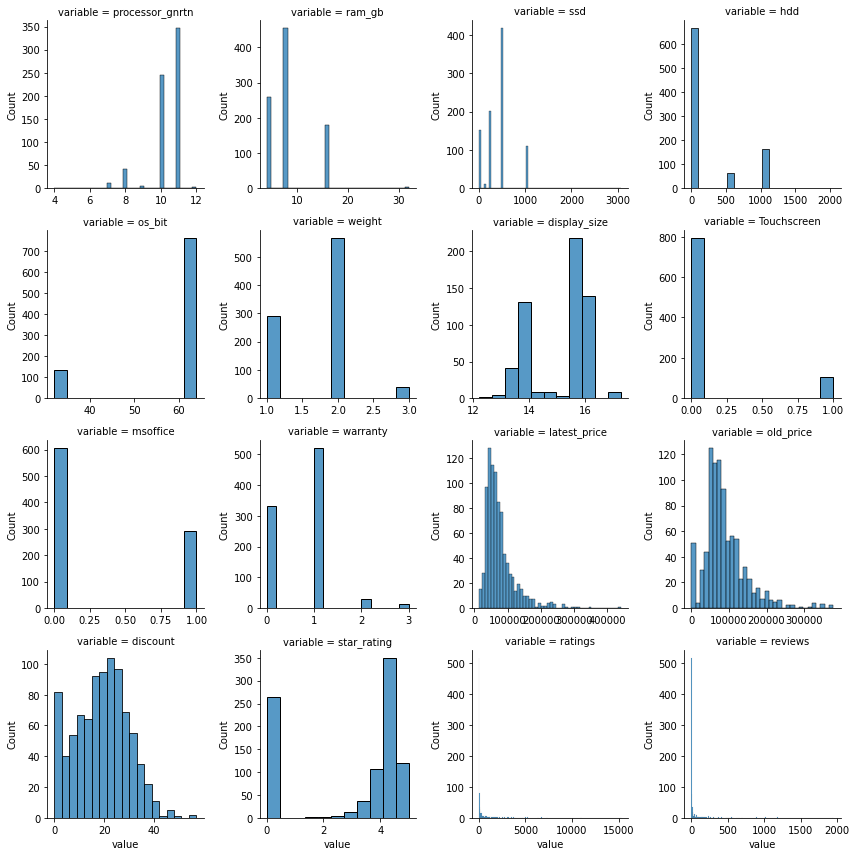

In [48]:
g = sns.FacetGrid(data =melted_by_brand , col="variable", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x = "value")
plt.show()

We will choose the Kendall method

#### 3.1 By model

In [187]:
data_groupby_model = data.groupby('model')[numeric_features].mean()
data_groupby_model

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
model,,,,,,,,,,,,,,,,
14a,NaN,4.000000,0.000000,512.000000,64.000000,2.000000,NaN,0.000000,0.000000,0.000000,26470.000000,31532.000000,16.000000,3.600000,232.000000,23.000000
14s,10.5,5.600000,358.400000,204.800000,64.000000,1.000000,NaN,0.000000,0.800000,0.800000,49092.000000,57970.800000,13.800000,4.200000,1732.600000,186.000000
15,10.0,10.666667,298.666667,341.333333,42.666667,1.333333,15.6,0.000000,0.000000,1.000000,66307.000000,35999.333333,16.000000,2.866667,708.666667,101.333333
15-ec1105AX,NaN,8.000000,512.000000,0.000000,64.000000,2.000000,15.6,0.000000,0.000000,1.000000,58990.000000,70172.000000,15.000000,4.500000,1049.000000,134.000000
15q,7.5,5.333333,0.000000,1024.000000,64.000000,2.000000,15.6,0.000000,0.000000,0.666667,37554.000000,16730.000000,2.000000,4.133333,1242.000000,136.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zenbook,11.0,9.142857,731.428571,0.000000,59.428571,1.857143,15.0,0.714286,0.428571,0.428571,98275.714286,127847.142857,22.571429,1.271429,12.285714,2.285714
Zephyrus,11.0,11.200000,1433.600000,0.000000,44.800000,2.000000,16.0,0.000000,0.000000,1.000000,205443.800000,102994.000000,13.600000,1.860000,1.600000,0.200000
t.book,7.0,5.333333,128.000000,0.000000,64.000000,2.000000,12.2,1.000000,0.000000,0.000000,49656.666667,52662.666667,5.333333,3.633333,27.666667,6.333333


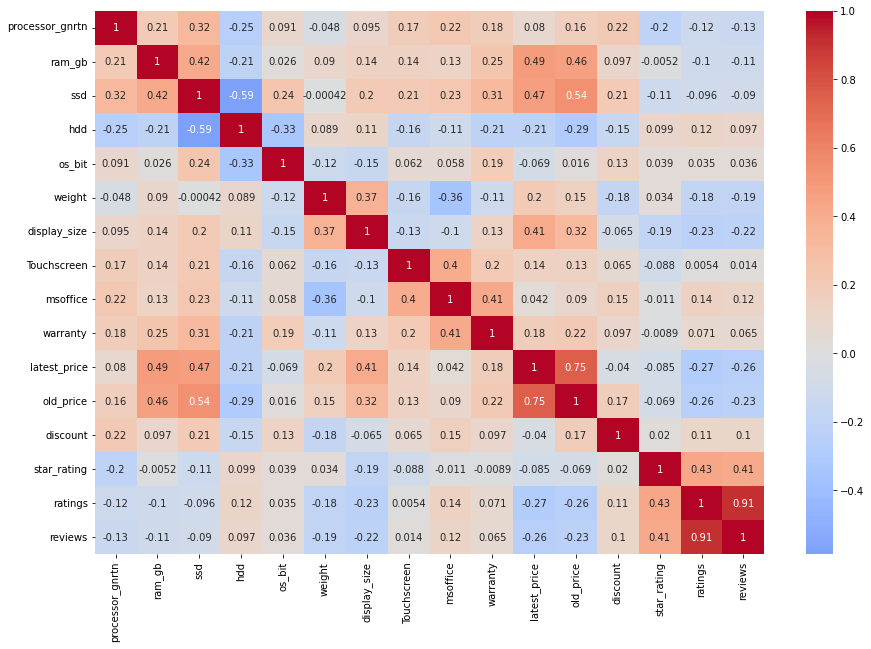

In [188]:
corrs = data_groupby_model.corr(method = 'kendall')
plt.figure(figsize=(15,10))  
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

<div>
<img src="ssdhdd/red.png" width="100"/>
</div>

<AxesSubplot:xlabel='hdd', ylabel='ssd'>

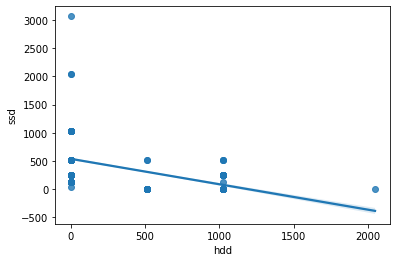

In [192]:
sns.regplot(x='hdd', y='ssd', data=data) #-0.59 

<AxesSubplot:xlabel='hdd', ylabel='Percent'>

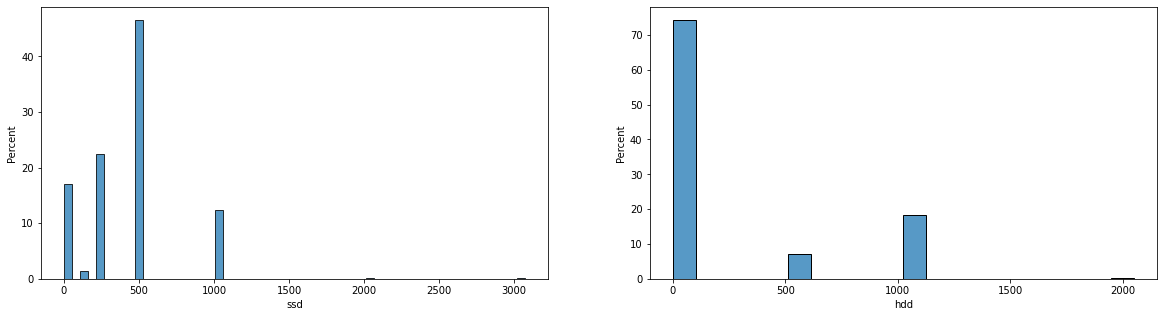

In [193]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.histplot(data = data, x='ssd', stat = 'percent',ax = ax[0])
sns.histplot(data = data, x='hdd', stat = 'percent',ax = ax[1])

 תחילה ניתן לראות כי יש לנו התקבצות גדולה מאוד של מחשבים אשר הם חסרי דיסק קשיח 
 ל75% מהמחשבים אין דיסק קשיח .

In [194]:
len(data[data.hdd == 0])/len(data)*100 # 666/896*100

74.33035714285714

In [195]:
len(data[(data.ssd == 0) & (data.hdd>0)])/len(data)*100  #151/896*100

16.852678571428573

 מחשבים שיש להם את 2 הכוננים 
 רק לכ-9 אחוז מהמחשבים יש את 2 הכוננים

In [196]:
hdd_ssd = data[(data.ssd >0) & (data.hdd>0)]
len(hdd_ssd)/len(data)*100 # 79/896*100

8.816964285714286

 המחשבים שיש להם כונן מסוג אייץ אשר שונה מ0

In [197]:
230/896*100

25.669642857142854

 https://www.mylist.co.il/%D7%9E%D7%93%D7%A8%D7%99%D7%9B%D7%99%D7%9D/%D7%9B%D7%95%D7%A0%D7%9F-ssd-%D7%90%D7%95-%D7%9B%D7%95%D7%A0%D7%9F-hdd/
 קישור לטבלה בין הכוננים וההבדלים ביניהם.

מסקנות מן הנתונים הנ"ל:
ניתן לראות כי למרבית המחשבים יש כונן מסוג אס על פני סוג אייץ כנראה מפאת ביצועים כמו מהירות,אורך חיים עמידות וכ"ו.
                                                                                    בנוסף לכך ניתן להבין כי מרבית המחשבים שמיוצרים היום הם מחשבים בעלי כונן מסוג אס וזאת משום שמרבית המחשבים הנמכרים היום הם בעיקר בעלי כונן מסוג אס ככה שניתן להבין מכך שהוא גם כונן טוב יותר ומתאים יותר לצרכי הלקוחות אם הוא הכונן המיוצר ביותר .
    

 המסקנה מכלל החישובים והגרפים אשר נעשו מעלה הם:
 מרבית המחשבים מעדיפים להיות חסרי כונן מסוג אייץ ובעלי כונן מסוג אס וזאת כנראה בגלל מהירות ביצועים טובה יותר פחות רעשים וכו.
 בטבלה אשר ישנה בקישור נוכל לראות את ההבדלים.
 בנוסף לכך האנשים שיש להם גם וגם שזה כמעט 17 אחוז מהקונים אלו אנשים שכנראה צריכים להוריד קבצים כבדים מאוד + לשחק במשחקים אשר דורשים הרבה מקום במחשב.
 על פי הגרפים ניתן לראות שמרבית המחשבים בעלי כונן מסוג אס וחסרי כונן מסוג אייץ 

#### 3.2 By processor brand

In [52]:
data_groupby_processor_brand = data.groupby('processor_brand')[numeric_features].mean()
data_groupby_processor_brand

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
processor_brand,,,,,,,,,,,,,,,,
AMD,10.000000,7.00000,527.538462,157.538462,60.153846,1.75000,15.358116,0.110577,0.360577,0.730769,72934.480769,90099.086538,20.365385,2.869231,337.062500,44.254808
Intel,10.355049,8.89697,400.096970,255.224242,58.860606,1.69697,15.114677,0.121212,0.325758,0.672727,75060.671212,85250.983333,18.401515,2.951970,320.690909,41.248485
M1,10.000000,12.50000,565.333333,0.000000,64.000000,2.00000,13.887500,0.000000,0.000000,1.000000,148156.666667,159900.000000,7.208333,4.750000,1397.875000,136.041667
MediaTek,10.000000,4.00000,0.000000,512.000000,32.000000,2.00000,NaN,0.000000,0.000000,0.000000,22823.333333,25451.000000,9.666667,3.800000,4623.000000,553.000000
Qualcomm,NaN,4.00000,0.000000,512.000000,32.000000,2.00000,NaN,0.000000,0.000000,0.000000,38990.000000,47990.000000,18.000000,0.000000,0.000000,0.000000


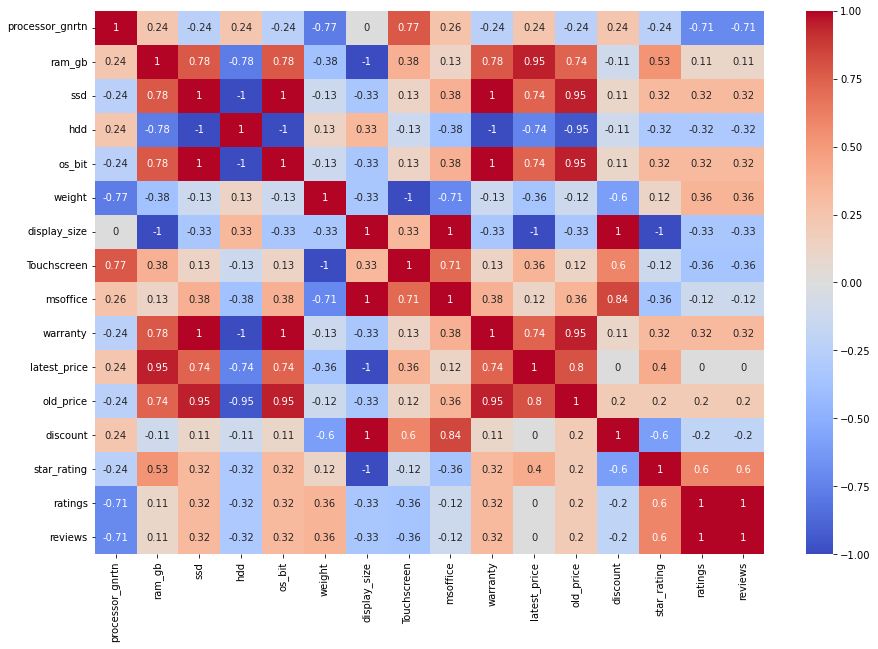

In [53]:
corrs = data_groupby_processor_brand.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

<AxesSubplot:xlabel='ram_gb', ylabel='latest_price'>

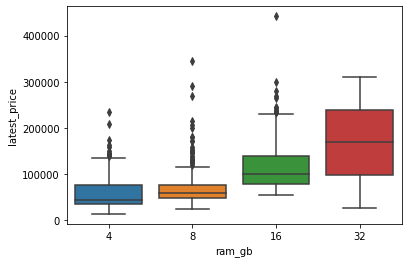

In [178]:
sns.boxplot(data=data ,x='ram_gb' , y='latest_price')#0.95

<AxesSubplot:xlabel='ram_gb', ylabel='os_bit'>

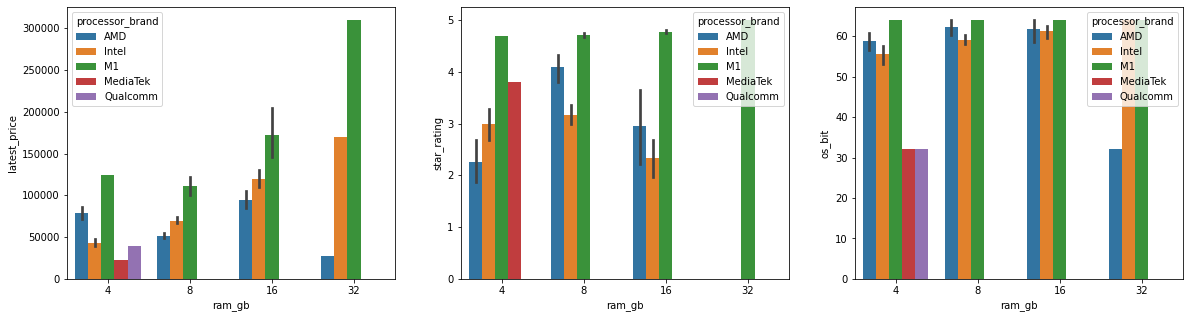

In [180]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(data=data ,x='ram_gb' , y='latest_price',hue='processor_brand', ax = ax[0])#0.95
sns.barplot(data=data ,x='ram_gb' , y='star_rating',hue='processor_brand', ax = ax[1])#0.53
sns.barplot(data=data ,x='ram_gb' , y='os_bit',hue='processor_brand',ax = ax[2])#0.78

מהגרף הראשון ניתן לראות שהמעבד מ1 הוא הכי יקר בכל אחד מהגדלים, בדר"כ מה שהכי יקר הוא נחשב לדגם טוב אז בדקנו את הדירוג שלו מול השאר והוא קיבל את הדירוג הכי טוב מכולם בממוצע 4.75, ובנוסף יש לו את המערכת ההפעלה הגבוהה (מריץ כמות של מידע יותר גדולה) בעלת ה64 ביט

<AxesSubplot:xlabel='ram_gb', ylabel='warranty'>

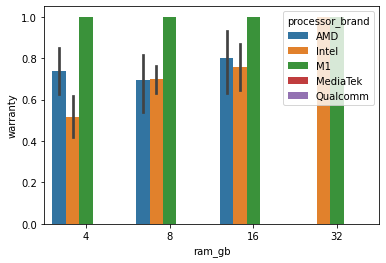

In [181]:
sns.barplot(data=data ,x='ram_gb' , y='warranty', hue ='processor_brand')#0.78
#להוסיף בוורנטי שזה אחוזים

מכאן ניתן לראות גם שהדגם של מ1 הוא עם אחריות ממוצעת של שנה לפחות לעומת הדגמים האחרים (לבדוק אם אפשר לא ממוצע)  

---

>#### Observation :
> From all the data of the graphs it can be seen that the model of the m1 processor is the model that is most recommended for purchase in all respects, it is rated the highest, it has the best operating (לתקן את זה) system, and it has one year warranty compared to the other models.

---

#### 3.3 By ram type

In [57]:
data_groupby_ram_type = data.groupby('ram_type')[numeric_features].mean()
data_groupby_ram_type

,processor_gnrtn,ram_gb,ssd,hdd,os_bit,weight,display_size,Touchscreen,msoffice,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
ram_type,,,,,,,,,,,,,,,,
DDR3,7.272727,8.333333,256.000000,128.000000,64.000000,1.583333,14.100000,0.416667,0.250000,0.500000,77939.500000,74231.500000,9.916667,3.783333,135.500000,23.333333
DDR4,10.389587,8.436842,426.989474,237.136842,60.126316,1.709211,15.129165,0.085526,0.343421,0.731579,70955.752632,82252.169737,18.650000,3.032237,380.655263,47.451316
DDR5,10.666667,8.000000,704.000000,64.000000,48.000000,2.000000,16.000000,0.000000,0.000000,0.250000,153490.000000,188241.125000,19.875000,1.062500,1372.000000,148.500000
LPDDR3,9.571429,12.571429,768.000000,0.000000,64.000000,1.714286,15.662500,0.071429,0.285714,0.500000,138870.857143,117761.214286,13.928571,2.278571,9.785714,0.857143
LPDDR4,10.080000,7.111111,42.666667,497.777778,35.555556,1.916667,15.355556,0.000000,0.027778,0.111111,108063.777778,119917.777778,16.083333,3.394444,389.666667,53.833333
LPDDR4X,10.702128,9.636364,634.181818,46.545455,60.606061,1.712121,14.927083,0.484848,0.318182,0.681818,97720.924242,122638.621212,20.833333,2.393939,198.757576,28.363636


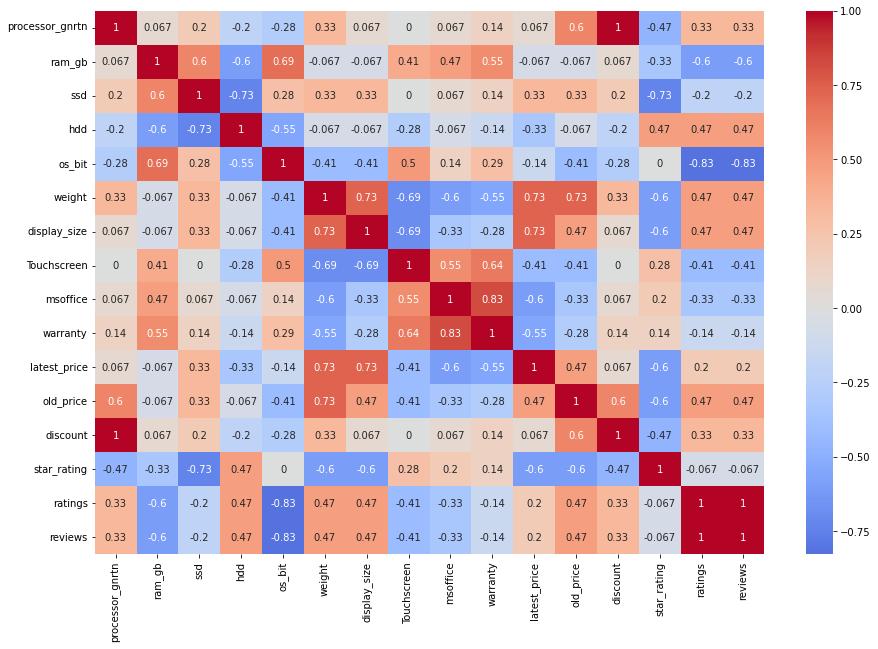

In [58]:
corrs = data_groupby_ram_type.corr(method = 'kendall')
plt.figure(figsize=(15,10)) 
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

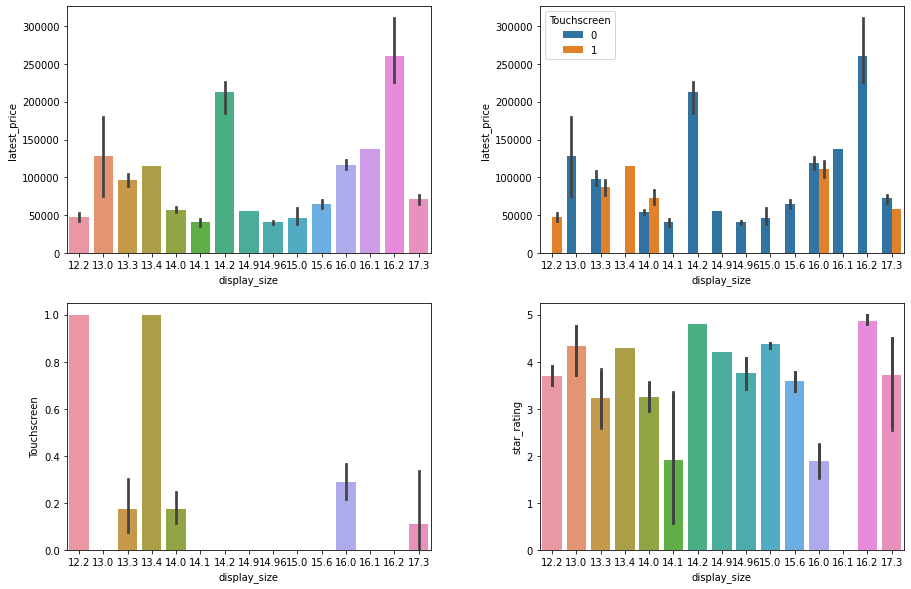

In [175]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
plt.subplots_adjust(wspace = 0.3)
sns.barplot( x = 'display_size', y = 'latest_price', data=data, ax = ax[0,0])
sns.barplot( x = 'display_size', y = 'latest_price',hue = 'Touchscreen', data=data, ax = ax[0,1])
sns.barplot( x = 'display_size', y = 'Touchscreen', data=data, ax = ax[1,0])
sns.barplot( x = 'display_size', y = 'star_rating', data=data, ax = ax[1,1])
sns.barplot( x = 'display_size', y = 'star_rating', data=data, ax = ax[1,1])
plt.show()

In [176]:
data['latest_price'].mean()

76309.86049107143

In [177]:
data['Touchscreen'].mean()#ממוצע נמוך של יצור מחשבי טאץ

0.11495535714285714

מסקנות- ניתן לראות מהגרף כי טווח המחירים של מחשבי טאץ הינו מחיר ממוצע למחשב ולכן ניתן להסיק כי קניית מחשב טאץ זה לא מחיר גבוה יותר ממחשב רגיל. ניתן לראות כי ישנם שני גדלי מחשב (12.2,13.4) אשר נמכרים רק כמסכי טאץ הדירוג שלהם הינו גבוה יחסית (4 לערך), אך ממוצע יצור מחשבי טאץ הינו נמוך יחסית (11%) מכאן אנו מבינים שביקוש מחשבי טאץ הינו יחסית נמוך ולכן מחירו הינו בטווח הממוצע.

#### 3.4 Facusing on specific columns

As we said before we will check the data without the zero's in the ratings and star ratings

In [61]:
data_no_zero_ratings = data[(data.ratings != 0) & (data.star_rating != 0)].copy()
data_no_zero_ratings

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10.0,4,DDR4,0,1024,Windows,...,NaN,0,0,0,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10.0,4,DDR4,0,512,Windows,...,NaN,0,0,0,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,128,0,Windows,...,NaN,0,0,0,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10.0,4,DDR4,256,0,Windows,...,NaN,0,0,0,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,ASUS,ROG,AMD,Ryzen 9,NaN,4,LPDDR4X,1024,0,Windows,...,16.0,1,1,1,124990,175990,28,5.0,3,0
881,ASUS,ROG,AMD,Ryzen 9,NaN,4,LPDDR4X,1024,0,Windows,...,NaN,1,1,1,142990,201990,29,4.0,4,1
883,ASUS,ROG,AMD,Ryzen 9,NaN,4,LPDDR4X,1024,0,Windows,...,NaN,1,1,1,124990,194990,35,4.2,44,12
884,ASUS,ROG,AMD,Ryzen 9,NaN,4,DDR4,1024,0,Windows,...,16.0,0,0,0,141990,189990,25,4.2,61,13


Lets return to the graphs that we showed before just with the new data (without the zeros)

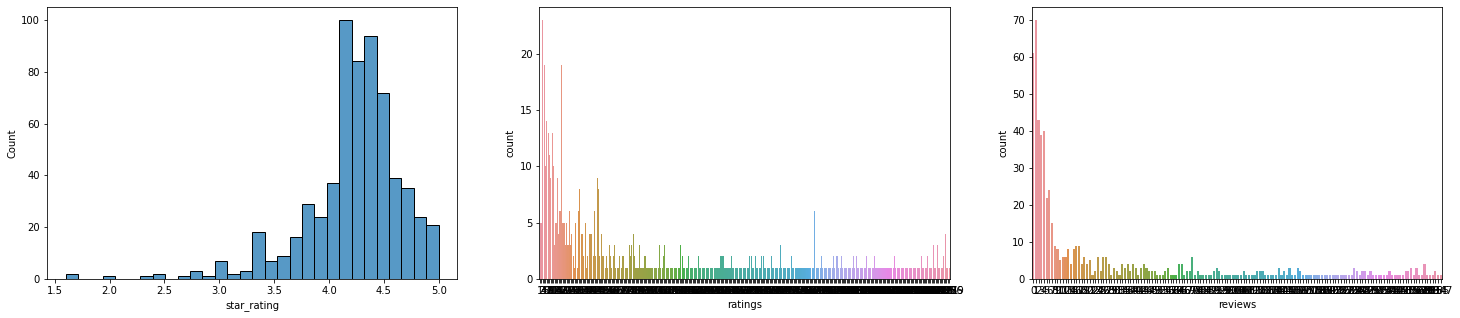

In [62]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
ax0 = sns.histplot(data = data_no_zero_ratings, x = 'star_rating', ax = ax[0])
ax1 = sns.countplot(data = data_no_zero_ratings, x = 'ratings', ax = ax[1])
ax2 = sns.countplot(data = data_no_zero_ratings, x = 'reviews', ax = ax[2])
plt.show()

Lets zoom in the rating graphs to see that they are small numbers and no zeros

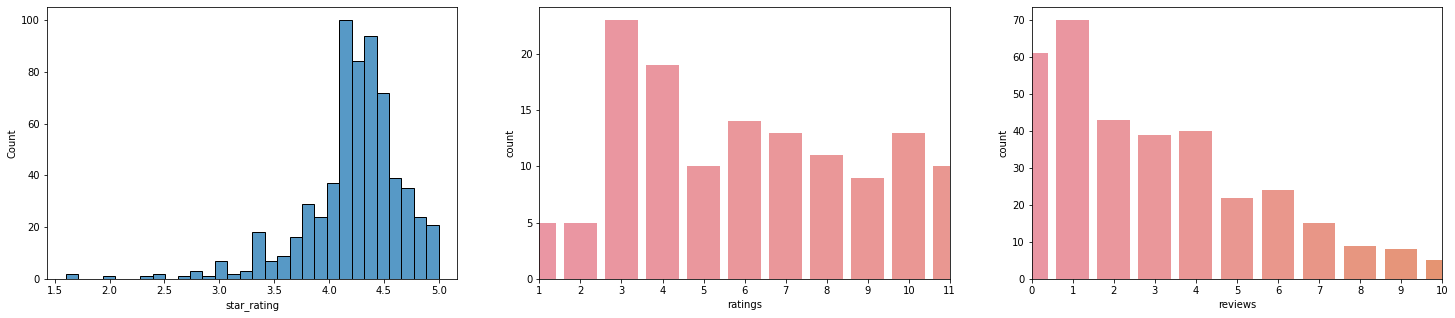

In [63]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
ax0 = sns.histplot(data = data_no_zero_ratings, x = 'star_rating', ax = ax[0])
ax1 = sns.countplot(data = data_no_zero_ratings, x = 'ratings', ax = ax[1])
ax1.set(xlim=(0,10))
ax2 = sns.countplot(data = data_no_zero_ratings, x = 'reviews', ax = ax[2])
ax2.set(xlim=(0,10))
plt.show()

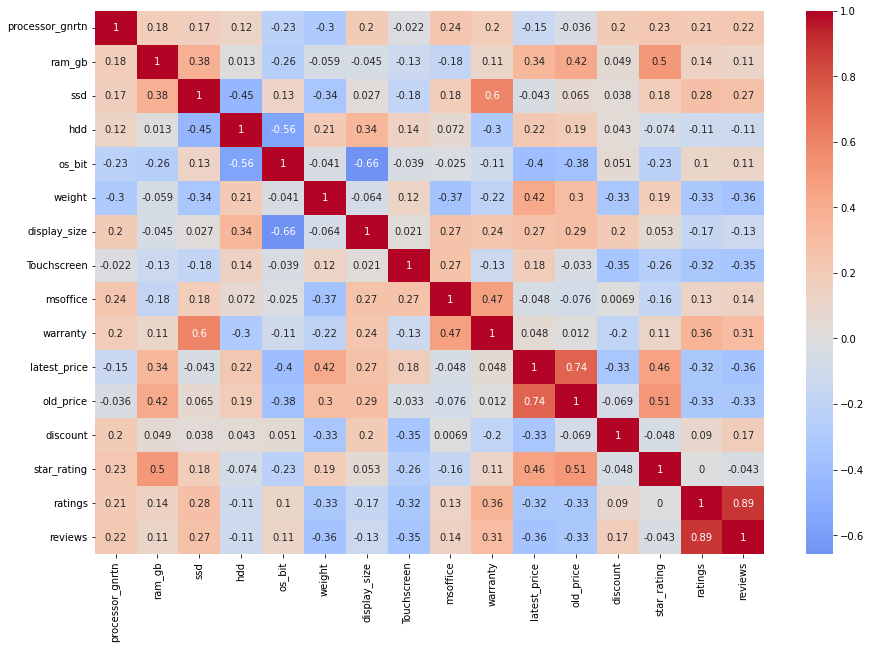

In [143]:
data_groupby_ram_type_no_zero = data_no_zero_ratings.groupby('brand')[numeric_features].mean()
corrs = data_groupby_ram_type_no_zero.corr(method = 'kendall')
plt.figure(figsize=(15,10))  
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

We will focus on the correlation between star ratings to the prices (before and after the discount)


<AxesSubplot:xlabel='star_rating', ylabel='old_price'>

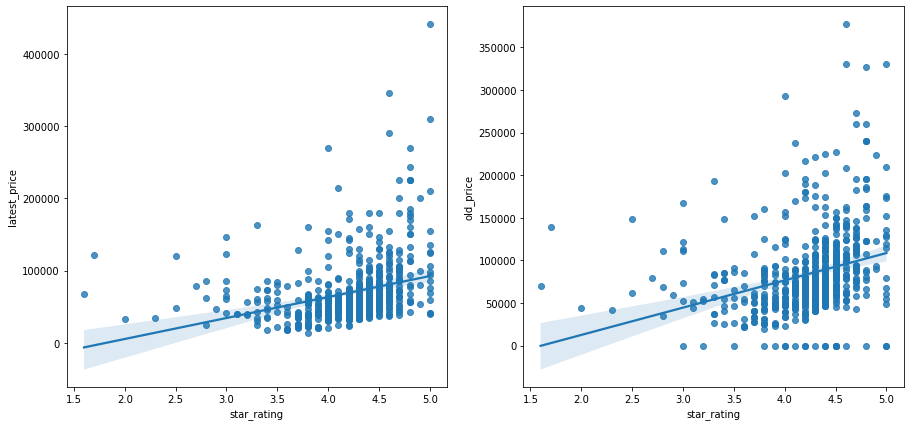

In [160]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
sns.regplot(data = data_no_zero_ratings, x = 'star_rating', y ='latest_price', ax=ax[0]) 
sns.regplot(data = data_no_zero_ratings, x = 'star_rating', y ='old_price', ax=ax[1]) 

---

>#### Observation 1:
>
> we can see that the prices are getting along with the costumers rates.
>
> We are suggesting 'Flipart.com' to continue with their prices program.
>
---